In [60]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv("pitch_features_baseline.csv")
df2 = pd.read_csv("pitch_features_ps_1.csv")

print(df1.iloc[100])
clip1 = df1.iloc[100]
print(df2.iloc[100])
clip2 = df2.iloc[100]

speaker                                                  id10270
video                                                GWXujl-xAVM
file                                                   00034.wav
mean_pitch                                            162.056769
std_pitch                                              34.422375
pitch_range                                           189.536532
cv                                                      0.212409
mean_slope                                             -0.026971
std_slope                                              260.35419
slope_range                                          2749.208625
cv_slope                                            -9653.217569
f0             [NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, ...
times          [0.32, 0.352, 0.384, 0.416, 0.448, 0.48, 0.512...
slopes         [-674.4831090954341, -99.8922546095419, -65.63...
Name: 100, dtype: object
speaker                                                  id10270


In [61]:
import json

import numpy as np

f0_1 = json.loads(clip1["f0"])
slopes_1 = json.loads(clip1["slopes"])
times_1 = json.loads(clip1["times"])

f0_2 = json.loads(clip2["f0"])
slopes_2 = json.loads(clip2["slopes"])
slopes_2 = np.asarray(slopes_2)
times_2 = json.loads(clip2["times"])


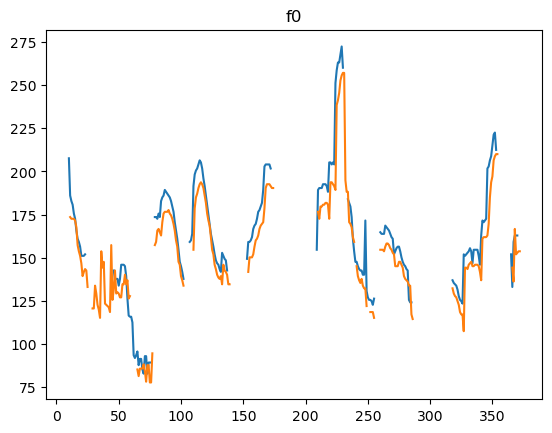

In [62]:
plt.plot([i for i in range(len(f0_1))], f0_1)
plt.plot([i for i in range(len(f0_2))], f0_2)
plt.title("f0")
plt.show()

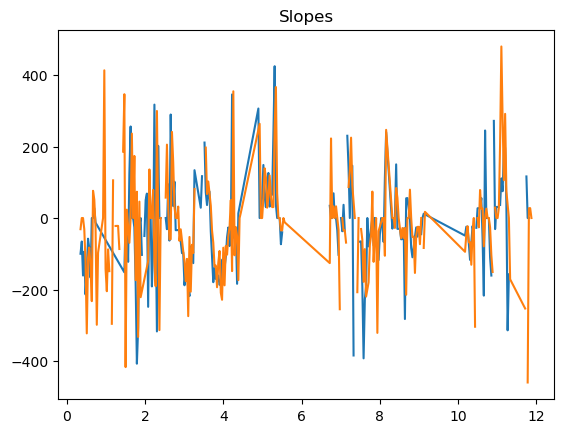

In [71]:
plt.plot(times_1[:-1], slopes_1)
plt.plot(times_2[:-1], slopes_2)
plt.title("Slopes")
plt.show()

In [ ]:
slopes_1 = np.asarray(slopes_1)
slopes_1[slopes_1 > 500] = np.nan
slopes_1[slopes_1 < -500] = np.nan
slopes_2 = np.asarray(slopes_2)
slopes_2[slopes_2 > 500] = np.nan
slopes_2[slopes_2 < -500] = np.nan

off = np.asarray(slopes_1) - np.asarray(slopes_2[: len(slopes_1)])

print(np.trapz(off[~np.isnan(off)], dx=0.128))
print(off[0:20])
print()
print(
    f"average: {np.mean(np.abs(off[~np.isnan(off)]))}, std: {np.std(np.abs(off[~np.isnan(off)]))}"
)

83.86335259129103
[          nan  -99.89225461  -65.6396232  -129.75226238   28.20417824
  108.86416922  -35.14839375   24.74940949   48.98634828   65.88926143
  -76.1427224   -51.49980456   53.18413246  285.81652413  -54.59725784
    0.         -413.11371054   19.91922086  327.29017959  343.66995327]

average: 131.1274806369409, std: 111.59266325637171
